## Introduction

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities. It is a more unique, personalized way of experiencing the world and meeting with new people. Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price. Hosts provide prices and other details for their rental or event listings, such as the allowed number of guests, home type, rules, and amenities.Pricing is determined by the host, with recommendations from Airbnb.Hosts and guests have the ability to leave reviews about the experience.

This dataset describes the listing activity and metrics in NYC, NY for 2019.
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

#### Inspiration
- Which factor (room types, neighbourhoods etc) contribute to the price most? <br/>
- Which type of post (key words) is correlate with high price?br/>
- What can we learn about different hosts and areas?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43933,33955057,Splendid 1 bdrm in West Village NYC,4189194,Sandra,Manhattan,West Village,40.73286,-74.00463,Entire home/apt,160,3,3,2019-06-07,1.88,1,2
27322,21566845,Seasonal Exposed Brick Private Bedroom !!!,134946389,Giovanni,Brooklyn,Bedford-Stuyvesant,40.68549,-73.93870,Private room,50,2,15,2019-07-04,0.75,5,4
44942,34481124,Charming Cobble Hill Brownstone Apartment,144522384,Amanda,Brooklyn,Carroll Gardens,40.68574,-73.99421,Entire home/apt,250,2,0,NaN,NaN,1,0
17195,13619385,Location Location Location! Chic Studio Availa...,47502969,Nekeshia,Manhattan,West Village,40.73273,-74.00704,Entire home/apt,275,3,12,2018-09-26,0.33,1,12
25609,20500896,Charming little apartment with back garden C.Park,100835599,Dalina,Manhattan,East Harlem,40.79099,-73.94500,Entire home/apt,400,1,0,NaN,NaN,2,364
42943,33348833,Cozy haven in the Upper East Side.,117792931,Stella,Manhattan,Upper East Side,40.78075,-73.95108,Entire home/apt,125,4,12,2019-06-22,3.96,1,0
5994,4387152,Petit chalet with secret garden,22262958,Kanae,Brooklyn,Williamsburg,40.71142,-73.95535,Entire home/apt,160,3,87,2019-06-19,1.63,1,302
8803,6757821,Riverside Dr Apartment,28813132,Junyuan,Manhattan,Morningside Heights,40.81656,-73.96122,Private room,70,1,0,NaN,NaN,1,0
14669,11588003,Charming Prewar Upper West Side Apt,4732500,Daniel,Manhattan,Upper West Side,40.79828,-73.97166,Entire home/apt,95,1,0,NaN,NaN,1,0
23397,18935508,Entire space !!! Yours alone! New building,43252773,Karim,Manhattan,Harlem,40.81119,-73.94751,Entire home/apt,199,2,5,2019-06-02,0.24,2,61


In [5]:
# it seems like this dataset contains some null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# some datatypes are incorrect 
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# quickly fix some datatype issues
df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
# quickly fix the null value issue
df['name'].fillna('None', inplace=True)
df['host_name'].fillna('None', inplace=True)
df['last_review'].fillna('None', inplace=True)

In [9]:
review_avg = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(review_avg, inplace = True)

### Univariate Exploration
First, let's look at the distribution of price. 

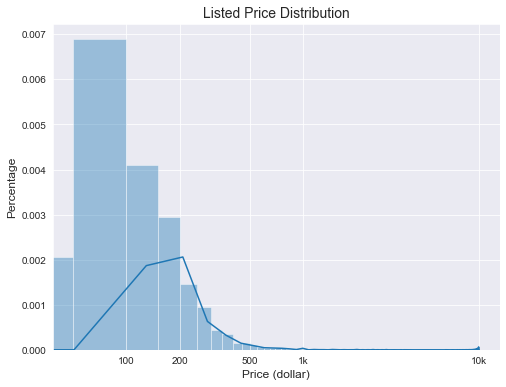

In [68]:
# plot distribution of price
plt.figure(figsize=(8, 6))
sns.distplot(df['price'], bins=200, kde=True)
plt.xscale('log') # log transform
plt.xticks([100, 200, 500, 1000, 10000], ['100', '200', '500', '1k', '10k'])
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Price (dollar)', fontsize=12)
plt.title('Listed Price Distribution', fontsize=14);

With a log transformation, we can see that the price is highly right skewed. Most listed price are under 500 dollars, with a peak around 100 dollars. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail. 

Next, let's look at the distribution of the average review per month.

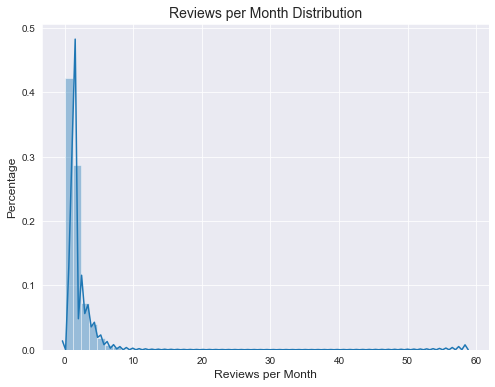

In [11]:
# plot ditribution of reviews per month 
plt.figure(figsize=(8, 6))
sns.distplot(df['reviews_per_month'].dropna(), kde=True)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Reviews per Month', fontsize=12)
plt.title('Reviews per Month Distribution', fontsize=14);

We can see that the review per month is also highly right skewed. Most hosts only get 1-2 reviews per month, with very few exceptional hosts. 

Next, let's look at the neighbourhood data. There are 221 of them, so we are going to look at the neighbourhood group instead. 

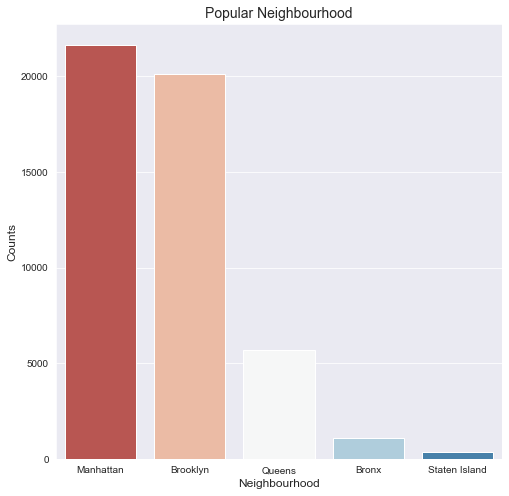

In [70]:
# plot bar plot for how many lists in each neighbourhood group
neighbourhood_counts = df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 8))
sns.barplot(neighbourhood_counts.index, neighbourhood_counts.values, palette='RdBu')
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Popular Neighbourhood', fontsize=14);

We can see that both Manhattan and Brooklyn are very popular, and staten island is the least popular neighbourhood group.

Last, we want to look at the distribution of minimum stay. The data contains some outliers, so we are going to look at the less than 40 days. (IQR = 4, which actually means over 11 days will be outlier in this dataset)

In [99]:
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

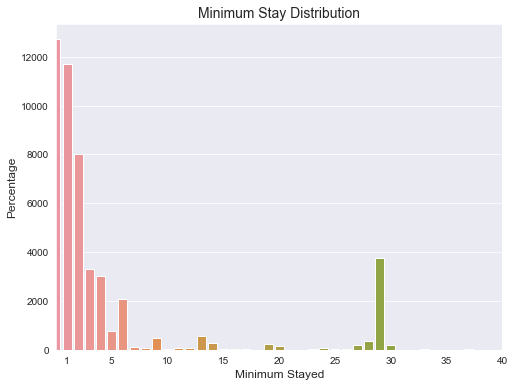

In [110]:
# plot minimun stay (<40 days) distribution 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='minimum_nights')
plt.xlim(0, 40)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Minimum Stayed', fontsize=12)
tick = [1,5,10,15,20,25,30,35,40]
plt.xticks(tick, tick)
plt.title('Minimum Stay Distribution', fontsize=14);

We can see that the data is following a bimodal distribution. Most host list minimun stays that are less than 5 days, with some hosts prefer stays around 30 days. 

### Bivariate Exploration

First, we will construct a plot of the price against reviews per month. What kind of shape does the relationship between these variables take?

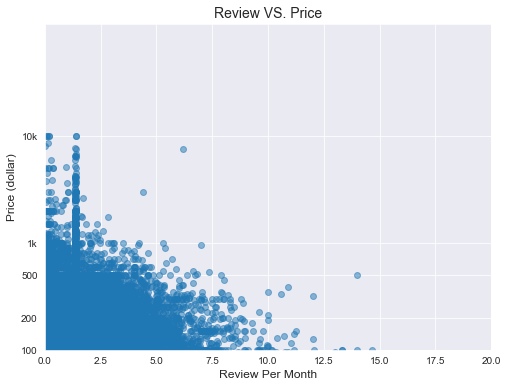

In [12]:
# plot scatter plot for review against price 
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='reviews_per_month', y='price', color=sns.color_palette()[0], 
                x_jitter = 0.04, y_jitter = 0.04, fit_reg=False, scatter_kws={'alpha': 0.5})
plt.yscale('log')
plt.yticks([100, 200, 500, 1000, 10000], ['100', '200', '500', '1k', '10k'])
plt.xlabel('Review Per Month', fontsize=12)
plt.ylabel('Price (dollar)', fontsize=12)
plt.xlim(0, 20)
plt.title('Review VS. Price', fontsize=14);

From the scatterplot above, we can't tell whether price is correlate with monthly review number.

In [78]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Next, let's take a look at the relationship between room types and listed price. 

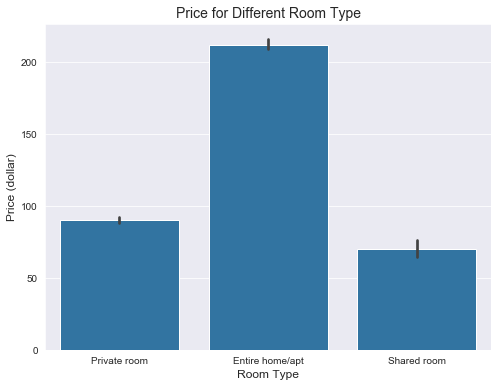

In [83]:
# plot bar plot for the mean/std of price for each room type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price', color=sns.color_palette()[0]);
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Price (dollar)', fontsize=12)
plt.title('Price for Different Room Type', fontsize=14);

As expected, the entire home/apartment room type is significantly more expensive than private or shared room. 

Next, we want to look at whether minimun night is correlated with price. Since previous we can see that most lists have minimum stay less than 5 days, here we mainly look at data with minimum stays less than 5 days.

In [23]:
df2 = df.query('minimum_nights <= 5')

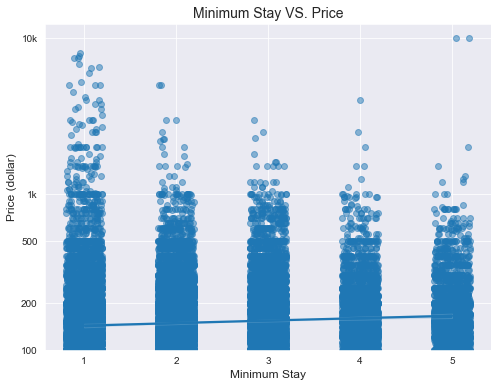

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df2, x='minimum_nights', y='price', color=sns.color_palette()[0],
           x_jitter = 0.2, y_jitter = 0, scatter_kws={'alpha': 0.5})
plt.yscale('log')
plt.yticks([100, 200, 500, 1000, 10000], ['100', '200', '500', '1k', '10k'])
plt.xlabel('Minimum Stay', fontsize=12)
plt.ylabel('Price (dollar)', fontsize=12)
plt.title('Minimum Stay VS. Price', fontsize=14);

From the plot above, we can see that the median price goes up long with the minimum stay in general.

Explore the most common words in different price group. 

In [132]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [18]:
# segment price into two groups by median 
bin_edges = [0, 106, 10000]
bin_name = ['low', 'high']
df['price_bin'] = pd.cut(df['price'], bins=bin_edges, labels=bin_name)

In [19]:
# get the post content for each price group in a string 
low = ''
df_low = df[df['price_bin'] == 'low']['name'].astype(str)
for i in range(len(df_low)):
    words = df_low.iloc[i].split(' ')
    for word in words:
        low += word+' '
        
high = ''
df_high = df[df['price_bin'] == 'high']['name'].astype(str)
for i in range(len(df_high)):
    words = df_high.iloc[i].split(' ')
    for word in words:
        high += word+' '

In [20]:
# Get the most popular 5 words for each price group and convert to dataframe
from collections import Counter
low_Counter = Counter(low.lower().split(' '))
low_occur = low_Counter.most_common(5)

high_Counter = Counter(high.lower().split(' '))
high_occur = high_Counter.most_common(5)

low_df = pd.DataFrame(low_occur, columns=['word', 'count'])
low_df = low_df.iloc[1:,:]

high_df = pd.DataFrame(high_occur, columns=['word', 'count'])
high_df = high_df.iloc[1:,:]

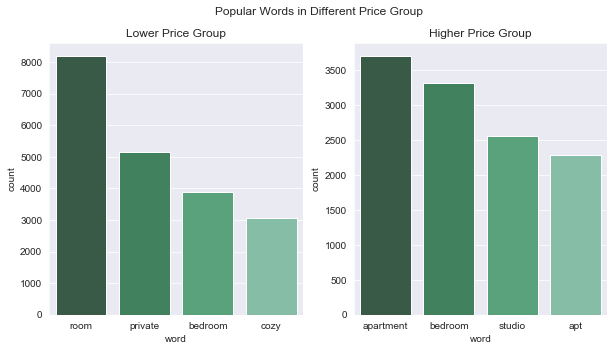

In [21]:
# create a bar plot for each price group, with most popular words
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=low_df, x='word', y='count', palette = "BuGn_d")
plt.title('Lower Price Group', fontsize=12);

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=high_df, x='word', y='count', palette = "BuGn_d")
plt.title('Higher Price Group', fontsize=12)
plt.suptitle('Popular Words in Different Price Group');

Seems like the lower listed price group prefer to use words like 'private' and 'cozy', while 'studio' and 'apartment' yield higher listed prices. 

### Multivariable Exploration

First, let's look at the price for different room types in different area.

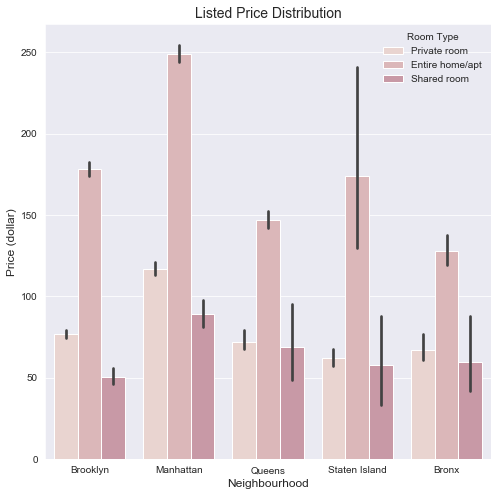

In [269]:
# plot price for different neighbourhood and room types
plt.figure(figsize=(8, 8))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', palette=sns.cubehelix_palette(8))
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Price (dollar)', fontsize=12)
plt.title('Price for different neighbourhood and room types', fontsize=14)
plt.legend(loc=1, framealpha=0, title='Room Type');

From the plot we can tell that entire home/apt is more expensive. In popular neighbourhoods like Brooklyn and Manhattan, private room is more expensive than shared room. However, when comes to less popular areas such as Queens, Sataen Island and Bronx, there's no significant difference between private and shared room. In this case, maybe choose a private room will render better living experiences.

Next, let's look at the availabitiy in a mapview. 

In [13]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [28]:
# remove outliers (> 1.5*IQR)
df2 = df[df['price'] <= 334]

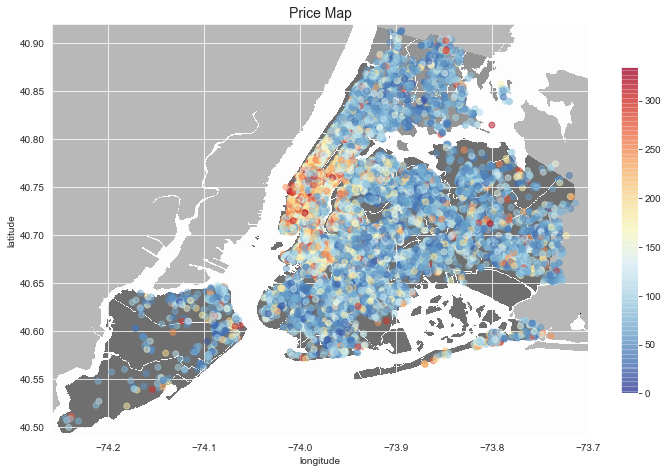

In [29]:
fig, ax = plt.subplots(figsize=(12,12))

# Show Background image
img=plt.imread('New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coordenates_to_extent)
cm = plt.cm.get_cmap('RdYlBu_r')

# Plotting
scatter_map = plt.scatter(data=df2, x='longitude', y='latitude', c='price', alpha=0.5, cmap=cm)
plt.colorbar(shrink = 0.5)
ax.grid(True)
plt.title('Price Map', fontsize=14)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

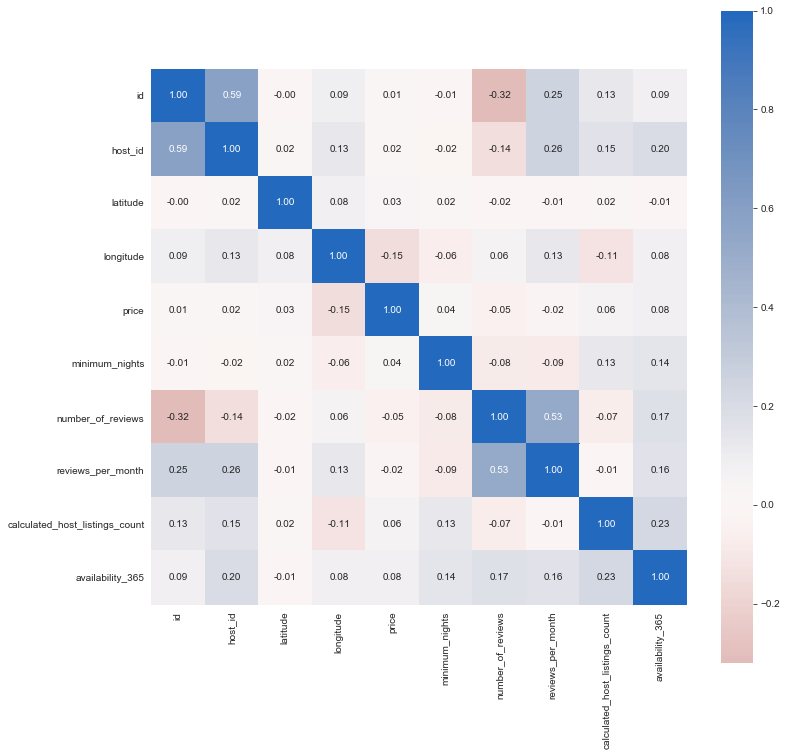

In [30]:
# create a pearson correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), square=True, annot=True, fmt = '.2f', cmap = 'vlag_r', center=0);

The results do not exhibit obvious, strong correlations between these variables. Only longitude show some negative correlation with the price, which we can tell a little bit from the mapview.